In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal as mvn

In [ ]:
creating dataset

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=4, n_samples=500, n_features=2, shuffle=True, random_state=40
)

function uselful in algorithm

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

Algorithm for K means

In [ ]:

class KMeans:
    def __init__(self, K, max_iters=100):
        self.K = K
        self.max_iters = max_iters

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []

    def fit(self, X):
      # creating the copy of otriginal data
        self.X = X   
        self.n_samples, self.n_features = X.shape

        # initialization

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # finding optimum clusters


        for _ in range(self.max_iters):
            self.clusters = self.new_clusters(self.centroids)

            # Calculating new centroids from the clusters

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if centrois have changed

            if self._is_changed(centroids_old, self.centroids):
                break

        return self.cluster_labels(self.clusters)

    

    def new_clusters(self, centroids):

        clusters = [[] for _ in range(self.K)]

        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)

        return clusters

    def _closest_centroid(self, sample, centroids):

      

        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_changed(self, centroids_old, centroids):
       
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def cluster_labels(self, clusters):
      #  khghvcchjnjfyfhhghg

        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx

        return labels

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

visulaizing clusters for k from 2 to 20
 and getting sillhoute score



Silhouette Scores:
For clusters = 2, the silhouette score is 0.47728880562894604



CLuster visualization is as follow:





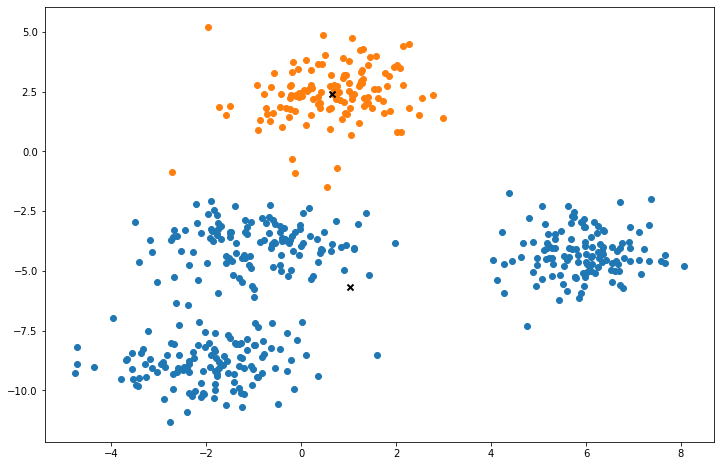

Silhouette Scores:
For clusters = 3, the silhouette score is 0.2539068314475052



CLuster visualization is as follow:





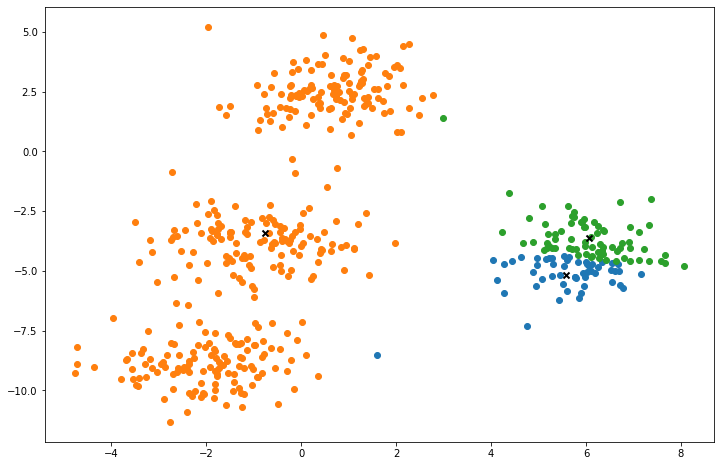

Silhouette Scores:
For clusters = 4, the silhouette score is 0.6935026375545649



CLuster visualization is as follow:





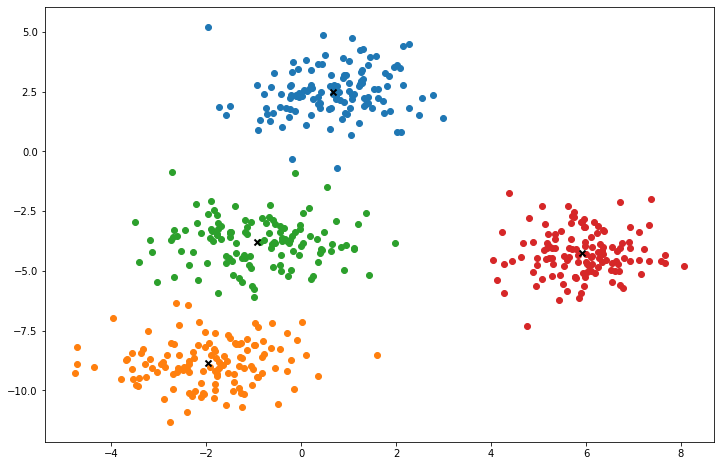

Silhouette Scores:
For clusters = 5, the silhouette score is 0.3078667992851555



CLuster visualization is as follow:





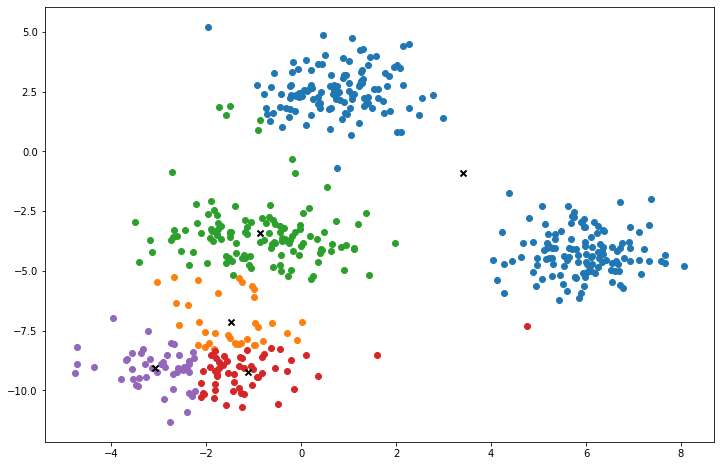

Silhouette Scores:
For clusters = 6, the silhouette score is 0.5142744848720042



CLuster visualization is as follow:





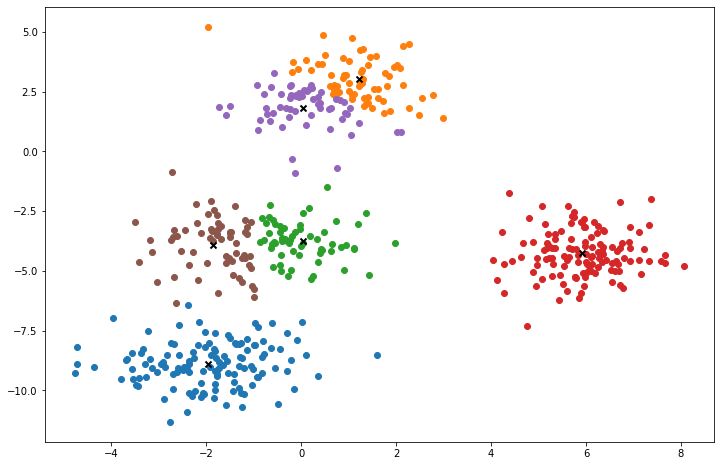

Silhouette Scores:
For clusters = 7, the silhouette score is 0.4902442899683414



CLuster visualization is as follow:





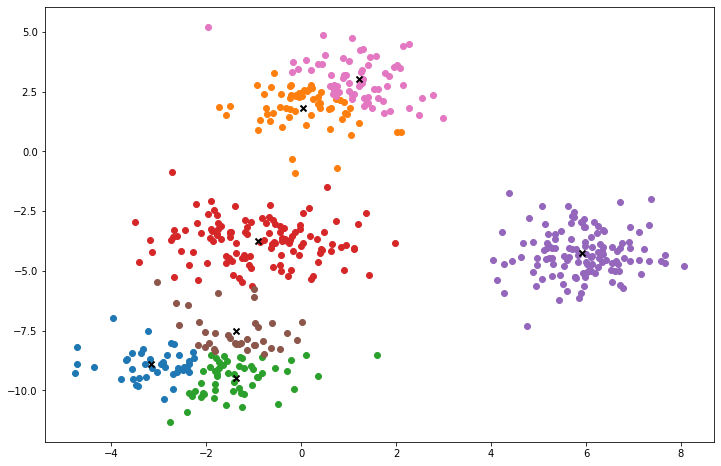

Silhouette Scores:
For clusters = 8, the silhouette score is 0.3435454583786461



CLuster visualization is as follow:





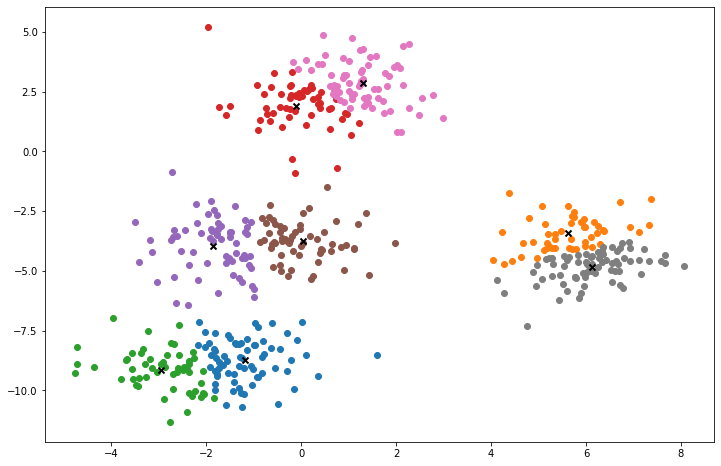

Silhouette Scores:
For clusters = 9, the silhouette score is 0.4330636046410258



CLuster visualization is as follow:





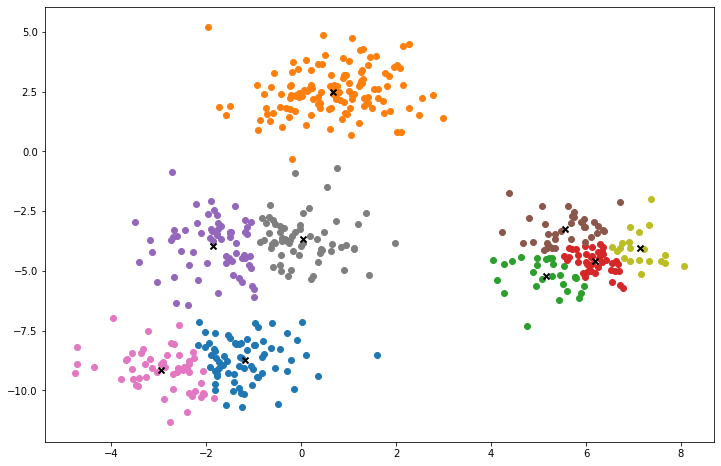

Silhouette Scores:
For clusters = 10, the silhouette score is 0.3533500929941504



CLuster visualization is as follow:





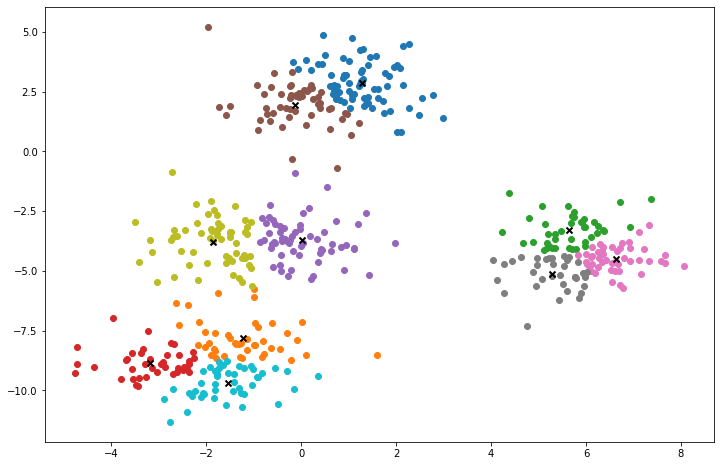

Silhouette Scores:
For clusters = 11, the silhouette score is 0.3889627144841535



CLuster visualization is as follow:





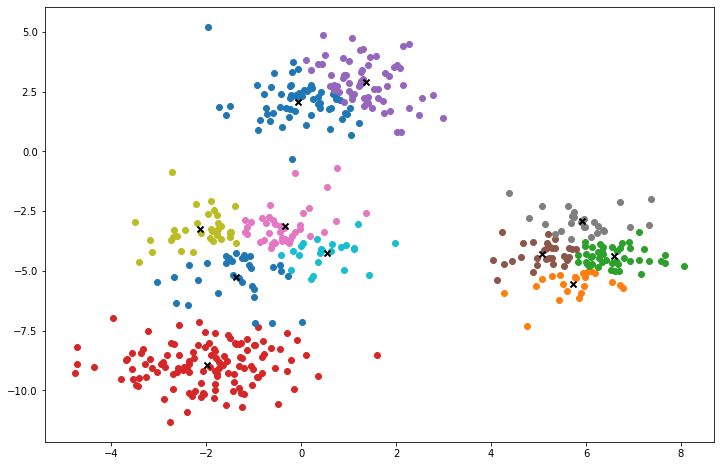

Silhouette Scores:
For clusters = 12, the silhouette score is 0.43565267802347435



CLuster visualization is as follow:





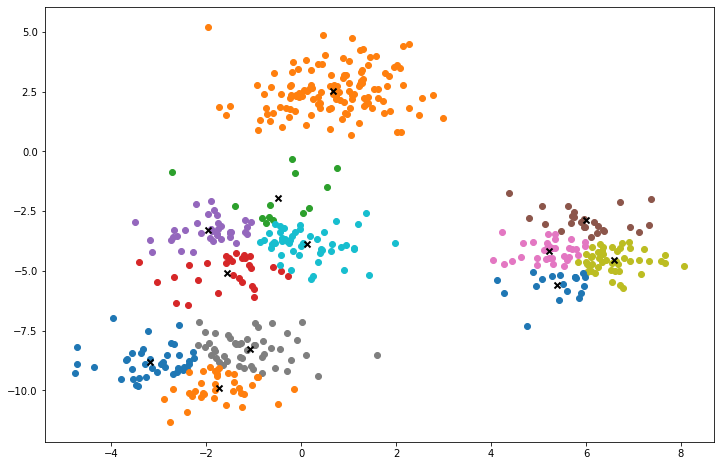

Silhouette Scores:
For clusters = 13, the silhouette score is 0.3443678324507275



CLuster visualization is as follow:





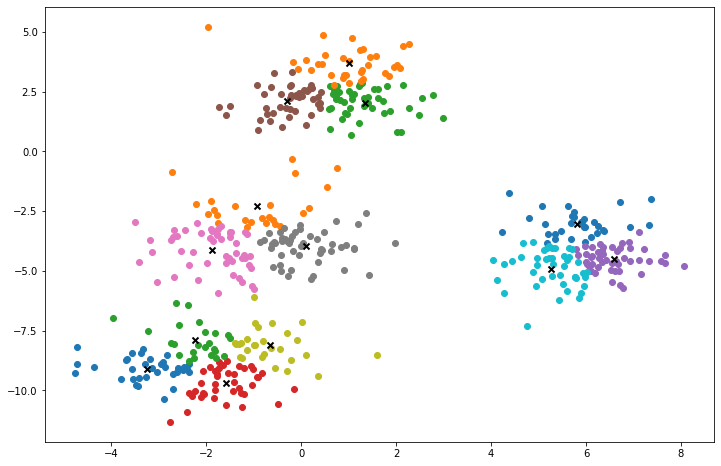

Silhouette Scores:
For clusters = 14, the silhouette score is 0.3526188329699888



CLuster visualization is as follow:





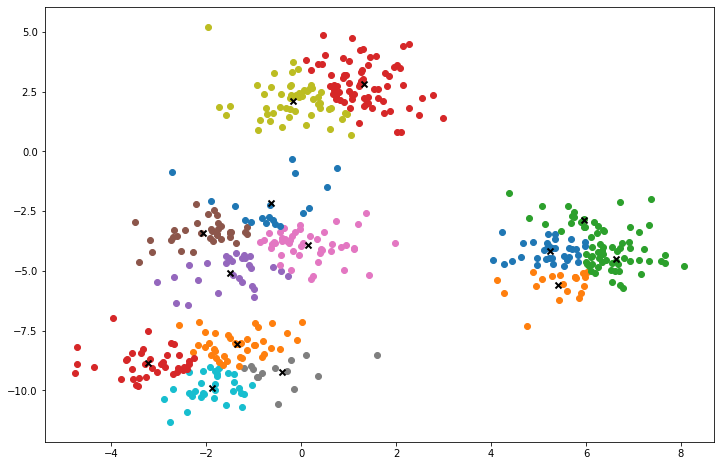

Silhouette Scores:
For clusters = 15, the silhouette score is 0.3462907948361411



CLuster visualization is as follow:





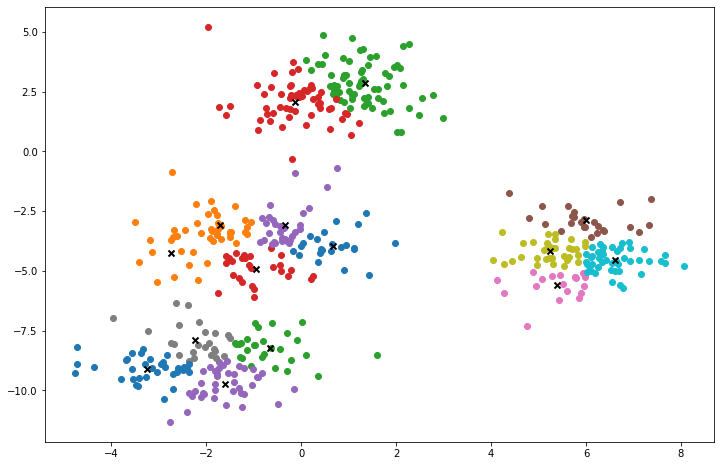

Silhouette Scores:
For clusters = 16, the silhouette score is 0.35764035054745646



CLuster visualization is as follow:





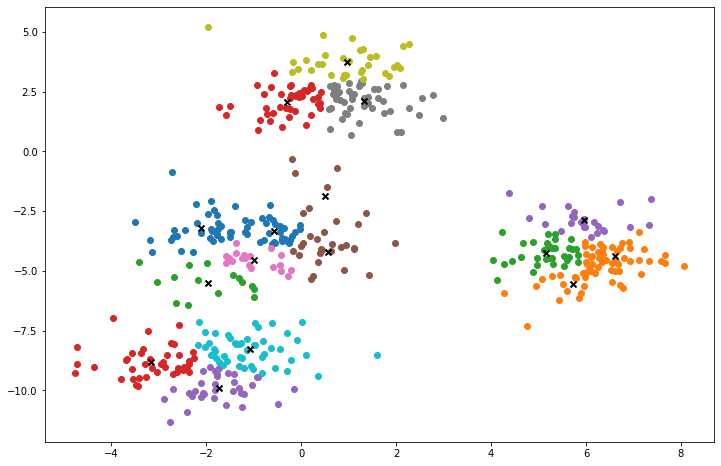

Silhouette Scores:
For clusters = 17, the silhouette score is 0.3475311947843315



CLuster visualization is as follow:





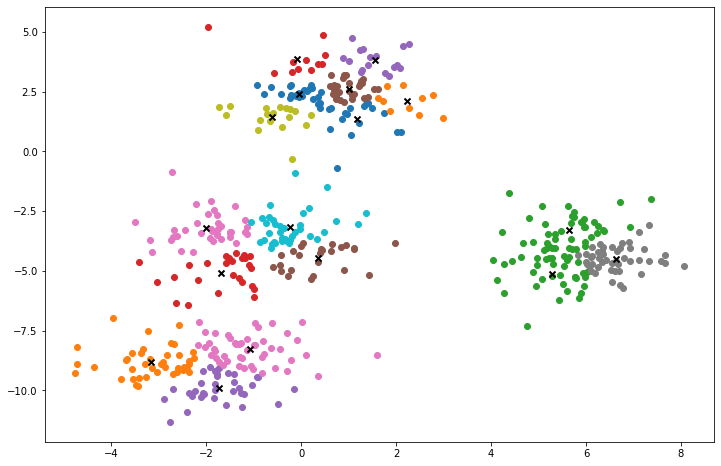

Silhouette Scores:
For clusters = 18, the silhouette score is 0.3473693963675726



CLuster visualization is as follow:





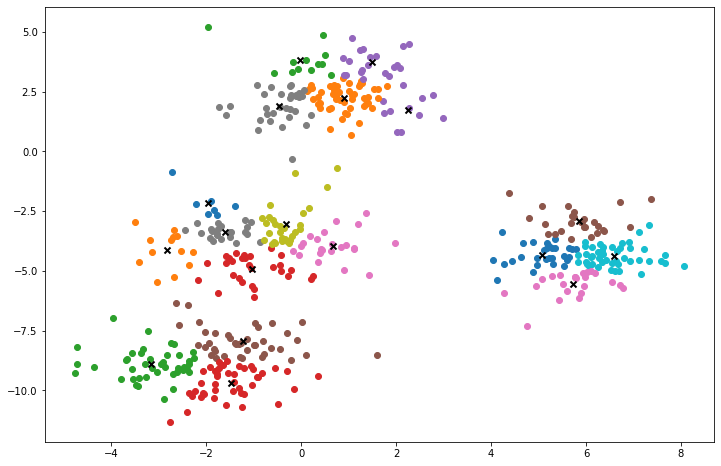

Silhouette Scores:
For clusters = 19, the silhouette score is 0.30844179752322587



CLuster visualization is as follow:





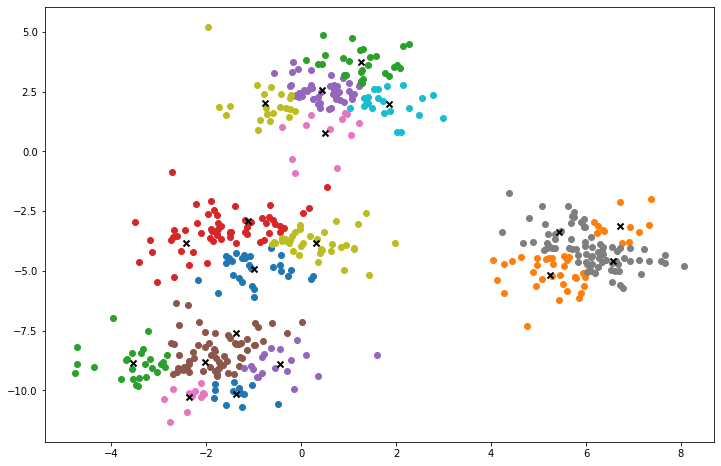

In [ ]:
ssd = []
y=[]
cluster=20
i=0
for num in range(2,cluster):
    k = KMeans(K=num, max_iters=150)
    y_ = k.fit(X)
    # y_=k.get_cluster_labels(clusters)
    score=silhouette_score(X,y_, metric='euclidean')
  
    print('Silhouette Scores:')
    print(f'For clusters = {num}, the silhouette score is {score}')
    print('\n\n')
    print('CLuster visualization is as follow:')
    print('\n\n')
    k.plot()
    ssd.append(score)
    y.append(num)




printing sillhoute curve

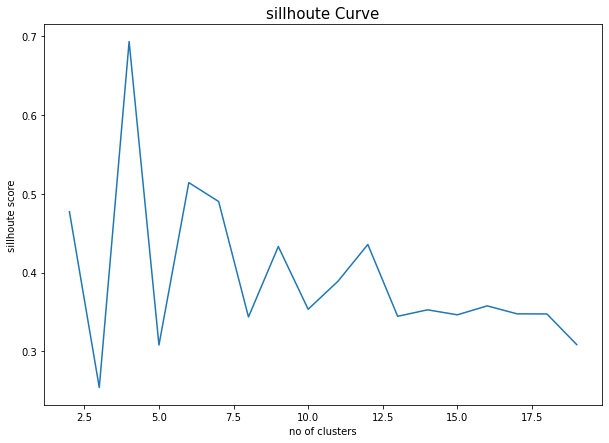

In [ ]:
print('\n\n')
plt.figure(figsize=(10,7))
plt.xlabel('no of clusters')
plt.ylabel('sillhoute score')
plt.plot(y,ssd)
plt.title('sillhoute Curve', fontsize=15)
plt.show()

using sillhoute curve we can see that optimum no of clusters is 4

so final clusturing

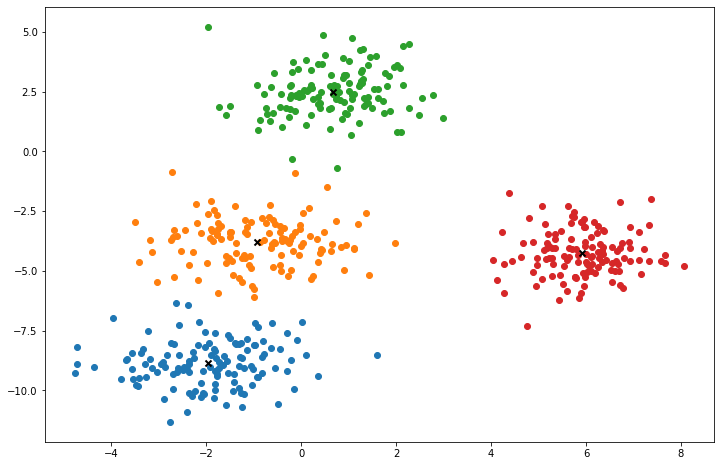

In [ ]:
k = KMeans(K=4, max_iters=150)
k.fit(X)
k.plot()

In [ ]:
now GMM algorithm

In [ ]:
def calculate_mean_covariance(X, prediction):
    C = 4
    d = X.shape[1]
    labels = np.unique(prediction)
    initial_means = np.zeros((C, d))
    initial_cov = np.zeros((C, d, d))
    initial_pi = np.zeros(C)
        
    counter=0
    for label in sorted(labels):
        ids = np.where(prediction == label) # returns indices
        initial_pi[counter] = len(ids[0]) / X.shape[0] 
        initial_means[counter,:] = np.mean(X[ids], axis = 0)
        de_meaned = X[ids] - initial_means[counter,:]
        Nk = X[ids].shape[0]
        initial_cov[counter,:, :] = np.dot(initial_pi[counter] * de_meaned.T, de_meaned) / Nk
        counter+=1
    assert np.sum(initial_pi) == 1
    return (initial_means, initial_cov, initial_pi)
from sklearn.cluster import KMeans    
n_clusters = 4
kmeans = KMeans(n_clusters= n_clusters, max_iter=500, algorithm = 'auto')
fitted = kmeans.fit(X)
prediction = kmeans.predict(X)

m, c, pi = calculate_mean_covariance(X, prediction)

In [ ]:
class GMM:
   
   
    def __init__(self, C, n_runs):
        self.C = C # number of Guassians/clusters
        self.n_runs = n_runs
        
    
    def get_params(self):
        return (self.mu, self.pi, self.sigma)
    
    
        
    def calculate_mean_covariance(self, X, prediction):
        
        d = X.shape[1]
        labels = np.unique(prediction)
        self.initial_means = np.zeros((self.C, d))
        self.initial_cov = np.zeros((self.C, d, d))
        self.initial_pi = np.zeros(self.C)
        
        counter=0
        for label in labels:
            ids = np.where(prediction == label) # returns indices
            self.initial_pi[counter] = len(ids[0]) / X.shape[0]
            self.initial_means[counter,:] = np.mean(X[ids], axis = 0)
            de_meaned = X[ids] - self.initial_means[counter,:]
            Nk = X[ids].shape[0] # number of data points in current gaussian
            self.initial_cov[counter,:, :] = np.dot(self.initial_pi[counter] * de_meaned.T, de_meaned) / Nk
            counter+=1
        assert np.sum(self.initial_pi) == 1    
            
        return (self.initial_means, self.initial_cov, self.initial_pi)
    
    
    
    def _initialise_parameters(self, X):
       
        n_clusters = self.C
        kmeans = KMeans(n_clusters= n_clusters, init="k-means++", max_iter=500, algorithm = 'auto')
        fitted = kmeans.fit(X)
        prediction = kmeans.predict(X)
        self._initial_means, self._initial_cov, self._initial_pi = self.calculate_mean_covariance(X, prediction)
        
        
        return (self._initial_means, self._initial_cov, self._initial_pi)
            
        
        
    def _e_step(self, X, pi, mu, sigma):
        
        N = X.shape[0] 
        self.gamma = np.zeros((N, self.C))

        const_c = np.zeros(self.C)
        
        
        self.mu = self.mu if self._initial_means is None else self._initial_means
        self.pi = self.pi if self._initial_pi is None else self._initial_pi
        self.sigma = self.sigma if self._initial_cov is None else self._initial_cov
        # mvn = multivariate_normal(mean=m, cov=c)
        for c in range(self.C):
           
            self.gamma[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])

    
        gamma_norm = np.sum(self.gamma, axis=1)[:,np.newaxis]
        self.gamma /= gamma_norm

        return self.gamma
    
    
    def _m_step(self, X, gamma):
       
        N = X.shape[0] # number of objects
        C = self.gamma.shape[1] # number of clusters
        d = X.shape[1] # dimension of each object

       
        self.pi = np.mean(self.gamma, axis = 0)

        self.mu = np.dot(self.gamma.T, X) / np.sum(self.gamma, axis = 0)[:,np.newaxis]

        for c in range(C):
            x = X - self.mu[c, :] # (N x d)
            
            gamma_diag = np.diag(self.gamma[:,c])
            x_mu = np.matrix(x)
            gamma_diag = np.matrix(gamma_diag)

            sigma_c = x.T * gamma_diag * x
            self.sigma[c,:,:]=(sigma_c) / np.sum(self.gamma, axis = 0)[:,np.newaxis][c]

        return self.pi, self.mu, self.sigma
    
    
    def _compute_loss_function(self, X, pi, mu, sigma):
       
        N = X.shape[0]
        C = self.gamma.shape[1]
        self.loss = np.zeros((N, C))

        for c in range(C):
            dist = mvn(self.mu[c], self.sigma[c],allow_singular=True)
            self.loss[:,c] = self.gamma[:,c] * (np.log(self.pi[c]+0.00001)+dist.logpdf(X)-np.log(self.gamma[:,c]+0.000001))
        self.loss = np.sum(self.loss)
        return self.loss
    
    
    
    def fit(self, X):
       
        d = X.shape[1]
        self.mu, self.sigma, self.pi =  self._initialise_parameters(X)
        
        try:
            for run in range(self.n_runs):  
                self.gamma  = self._e_step(X, self.mu, self.pi, self.sigma)
                self.pi, self.mu, self.sigma = self._m_step(X, self.gamma)
                loss = self._compute_loss_function(X, self.pi, self.mu, self.sigma)
                
           

        
        except Exception as e:
            print(e)
            
        
        return self
    
    
    
    
    def predict(self, X):
       
        labels = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            labels [:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
        labels  = labels .argmax(1)
        return labels 
    
    def predict_proba(self, X):
       
        post_proba = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
           
            post_proba[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
    
        return post_proba

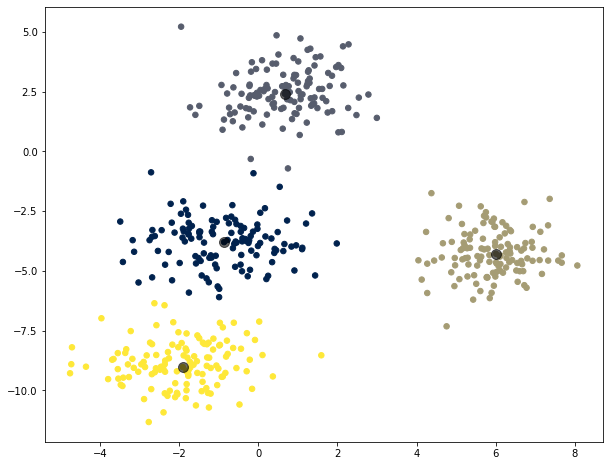

In [ ]:
gmm = GMM(4, n_runs = 100)
fitted_values = gmm.fit(X)

predicted_values = gmm.predict(X)
plt.figure(figsize = (10,8))
centers = np.zeros((4,2))

for i in range(gmm.C):
    density = mvn(cov=gmm.sigma[i], mean=gmm.mu[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
plt.scatter(X[:, 0], X[:, 1],c=predicted_values ,s=30, cmap='cividis')

plt.scatter(centers[:, 0], centers[:, 1],c='black', s=100, alpha=0.6);


In [ ]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    
    ax = ax or plt.gca()
    
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 6 * np.sqrt(s)
    else:
        angle = 0
        width, height = 6 * np.sqrt(covariance)
  
    ax.add_patch(Ellipse(position,  width, height,
                             angle, **kwargs))

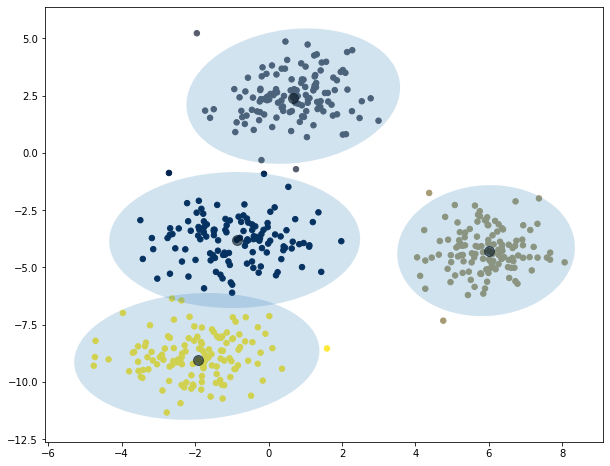

In [ ]:
        
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1],c=predicted_values ,s=30, cmap='cividis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=100, alpha=0.6);

w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.mu, model.sigma, model.pi):
    draw_ellipse(pos, covar, alpha=w * w_factor)

now comparing the results for various forms of the Covariance matrix in GMM

In [ ]:
def find_dist_score(means,d0,d1,d2,d3):
  total=0
  for point in d0:
    total+=euclidean_distance(point,means[0])
  for point in d1:
    total+=euclidean_distance(point,means[1])
  for point in d2:
    total+=euclidean_distance(point,means[2])
  for point in d3:
    total+=euclidean_distance(point,means[3])
  return total


for full coviarance matrix

the total sum of distribution of elements from means of gmm is = 1277.5176582822085 


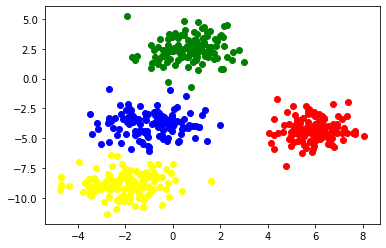

In [ ]:
  
dist_x=[]
dist_y=["full","diag","identity"]

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4,covariance_type='full', random_state=0)
predicted_values=gmm.fit(X)
labels = gmm.predict(X)
d = pd.DataFrame(X)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
d3=d[d['labels']== 3]
a0 = d0[d0.columns[0:-1]].values
a1 = d1[d1.columns[0:-1]].values
a2 = d3[d2.columns[0:-1]].values
a3 = d3[d3.columns[0:-1]].values

means=predicted_values.means_

distribution=find_dist_score(means,a0,a1,a2,a3)
dist_x.append(distribution-1277)
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d3[0], d3[1], c ='b')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')



print(f'the total sum of distribution of elements from means of gmm is = {distribution} ')

In [ ]:
d0
a0 = d0[d0.columns[0:-1]].values
a0

array([[ 5.34072051, -3.67907545],
       [ 5.28509992, -5.23361392],
       [ 5.20824026, -3.45763731],
       [ 5.89444501, -5.918027  ],
       [ 4.63596669, -4.43849283],
       [ 6.11927301, -4.35864203],
       [ 6.34223258, -4.63113749],
       [ 5.84804418, -6.14085233],
       [ 6.30258836, -3.87455154],
       [ 4.87544785, -5.05913158],
       [ 7.66655583, -4.65706593],
       [ 5.95187234, -5.62046522],
       [ 6.71388467, -4.05875892],
       [ 5.18959993, -3.81223748],
       [ 6.00812542, -4.64570987],
       [ 7.3626536 , -1.98367726],
       [ 4.04521591, -4.55742042],
       [ 7.32210183, -3.09355118],
       [ 4.75731782, -7.32117481],
       [ 5.96631116, -3.14668522],
       [ 6.38466156, -3.33813909],
       [ 5.75064504, -2.54212454],
       [ 7.10829131, -4.54700227],
       [ 7.32516879, -4.56819119],
       [ 6.36780758, -4.27227635],
       [ 5.15725265, -4.51708066],
       [ 5.84002747, -4.62002014],
       [ 6.72528041, -2.11494836],
       [ 4.26862938,

the total sum of distribution of elements from means of gmm is==1277.7360671354138 


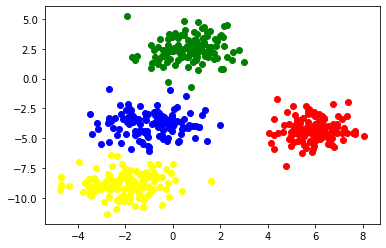

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4,covariance_type='diag', random_state=0)
predicted_values=gmm.fit(X)
labels = gmm.predict(X)
d = pd.DataFrame(X)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
d3=d[d['labels']== 3]

a0 = d0[d0.columns[0:-1]].values
a1 = d1[d1.columns[0:-1]].values
a2 = d3[d2.columns[0:-1]].values
a3 = d3[d3.columns[0:-1]].values

means=predicted_values.means_

distribution2=find_dist_score(means,a0,a1,a2,a3)
dist_x.append(distribution2-1277)
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d3[0], d3[1], c ='b')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
print(f'the total sum of distribution of elements from means of gmm is=={distribution2} ')

the total sum of distribution of elements from means of gmm is==1279.0831628722367 


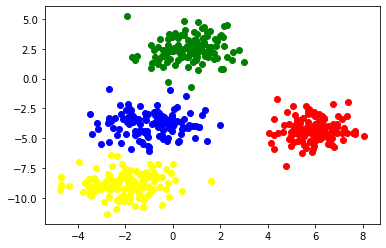

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4,covariance_type='spherical', random_state=0)
predicted_values=gmm.fit(X)
labels = gmm.predict(X)
d = pd.DataFrame(X)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
d3=d[d['labels']== 3]

a0 = d0[d0.columns[0:-1]].values
a1 = d1[d1.columns[0:-1]].values
a2 = d3[d2.columns[0:-1]].values
a3 = d3[d3.columns[0:-1]].values

means=predicted_values.means_

distribution3=find_dist_score(means,a0,a1,a2,a3)
dist_x.append(distribution3-1277)
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d3[0], d3[1], c ='b')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

print(f'the total sum of distribution of elements from means of gmm is=={distribution3} ')



full coviarance matrix gives least deviation from gmm mean
then diagonal matrix and then identity matrix

<BarContainer object of 3 artists>

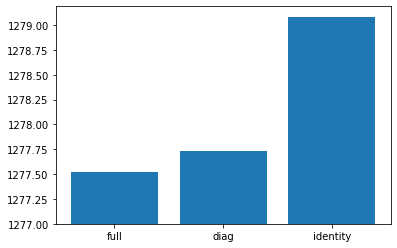

In [ ]:
plt.bar(dist_y,dist_x,bottom =1277)